In [8]:
# import the necessary packages
import numpy as np
import argparse
import cv2

from matplotlib import pyplot as plt
import os
from IPython.display import clear_output
from IPython.display import Image

## Detecting color in images using OpenCV

In [9]:
# define the list of boundaries
boundaries_hsv = [
	([0,50,50], [10,255,255]), # red
	([100,100,100], [130,255,255]), # blue
	([25, 152, 172], [90, 255, 255]), # green
	([135,193,216], [156, 255, 255]) # magenta
]

0
Number of white pixels: 211033
Number of black pixels: 2063015
Color pixel percentage: 9.0
1
Number of white pixels: 64969
Number of black pixels: 2209079
Color pixel percentage: 3.0
2
Number of white pixels: 186126
Number of black pixels: 2087922
Color pixel percentage: 8.0
3
Number of white pixels: 129577
Number of black pixels: 2144471
Color pixel percentage: 6.0


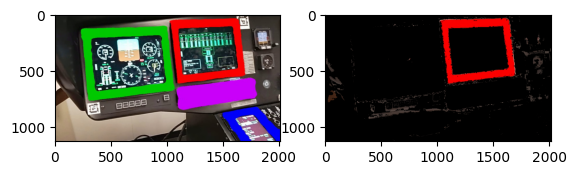

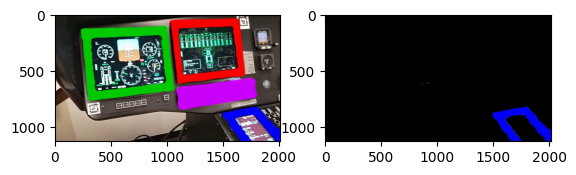

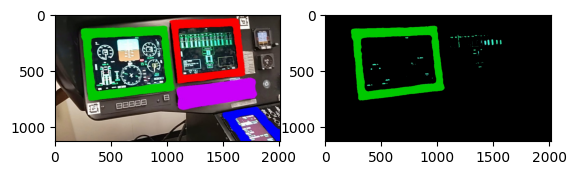

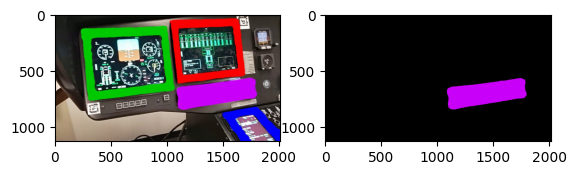

In [7]:
img = cv2.imread('image.png')[:,:,::-1]
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV) # convert the image from rgb to hsv. 

index = 0
for (lower, upper) in boundaries:
    print(index)
    # create NumPy arrays from the boundaries
    lower = np.array(lower, dtype = "uint8")
    upper = np.array(upper, dtype = "uint8")
    # find the colors within the specified boundaries and apply the mask
    mask = cv2.inRange(img_hsv, lower, upper)
    # color detected image
    output = cv2.bitwise_and(img, img, mask = mask)
    
    
    plt.figure()
    plt.subplot(121)
    plt.imshow(img)
    plt.subplot(122)
    plt.imshow(mask, cmap='gray')
    plt.imshow(output)
    
    # count mask
    number_of_white_pix = np.sum(mask == 255) # find color. alternative: cv2.countNonZero(mask)
    number_of_black_pix = np.sum(mask == 0) # didn't find color

    print('Number of white pixels:', number_of_white_pix) # cv2.countNonZero(mask)
    print('Number of black pixels:', number_of_black_pix)
    print('Color pixel percentage:', np.round(number_of_white_pix*100 / (number_of_white_pix + number_of_black_pix)))
    index+=1

    

## Choosing the correct upper and lower HSV boundaries
HSV color thresholder script with sliders, remember to change the image file path

In [ ]:
import cv2
import sys
import numpy as np

def nothing(x):
    pass

# Load in image
image = cv2.imread('image_3.png') # image.png

# Create a window
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('HMin','image',0,179,nothing) # Hue is from 0-179 for Opencv
cv2.createTrackbar('SMin','image',0,255,nothing)
cv2.createTrackbar('VMin','image',0,255,nothing)
cv2.createTrackbar('HMax','image',0,179,nothing)
cv2.createTrackbar('SMax','image',0,255,nothing)
cv2.createTrackbar('VMax','image',0,255,nothing)

# Set default value for MAX HSV trackbars.
cv2.setTrackbarPos('HMax', 'image', 179)
cv2.setTrackbarPos('SMax', 'image', 255)
cv2.setTrackbarPos('VMax', 'image', 255)

# Initialize to check if HSV min/max value changes
hMin = sMin = vMin = hMax = sMax = vMax = 0
phMin = psMin = pvMin = phMax = psMax = pvMax = 0

output = image
wait_time = 33

while(1):

    # get current positions of all trackbars
    hMin = cv2.getTrackbarPos('HMin','image')
    sMin = cv2.getTrackbarPos('SMin','image')
    vMin = cv2.getTrackbarPos('VMin','image')

    hMax = cv2.getTrackbarPos('HMax','image')
    sMax = cv2.getTrackbarPos('SMax','image')
    vMax = cv2.getTrackbarPos('VMax','image')

    # Set minimum and max HSV values to display
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Create HSV Image and threshold into a range.
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    output = cv2.bitwise_and(image,image, mask= mask)

    # Print if there is a change in HSV value
    if( (phMin != hMin) | (psMin != sMin) | (pvMin != vMin) | (phMax != hMax) | (psMax != sMax) | (pvMax != vMax) ):
        print("(hMin = %d , sMin = %d, vMin = %d), (hMax = %d , sMax = %d, vMax = %d)" % (hMin , sMin , vMin, hMax, sMax , vMax))
        phMin = hMin
        psMin = sMin
        pvMin = vMin
        phMax = hMax
        psMax = sMax
        pvMax = vMax

    # Display output image
    cv2.imshow('image',output)

    # Wait longer to prevent freeze for videos.
    if cv2.waitKey(wait_time) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 1 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 4 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 6 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 8 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 9 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 11 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 14 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 15 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 17 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 18 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 19 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 20 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 21 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255

(hMin = 0 , sMin = 50, vMin = 50), (hMax = 10 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 50, vMin = 50), (hMax = 9 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 50, vMin = 50), (hMax = 8 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 50, vMin = 50), (hMax = 7 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 50, vMin = 50), (hMax = 6 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 50, vMin = 50), (hMax = 5 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 50, vMin = 50), (hMax = 4 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 50, vMin = 50), (hMax = 3 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 50, vMin = 50), (hMax = 4 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 50, vMin = 50), (hMax = 5 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 50, vMin = 50), (hMax = 6 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 50, vMin = 50), (hMax = 7 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 50, vMin = 50), (hMax = 8 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 50, vMin = 50), (hMax = 9 , sMax = 255, vMax = 255)
(hMin

(hMin = 10 , sMin = 106, vMin = 50), (hMax = 10 , sMax = 255, vMax = 255)
(hMin = 10 , sMin = 109, vMin = 50), (hMax = 10 , sMax = 255, vMax = 255)
(hMin = 10 , sMin = 110, vMin = 50), (hMax = 10 , sMax = 255, vMax = 255)
(hMin = 10 , sMin = 111, vMin = 50), (hMax = 10 , sMax = 255, vMax = 255)
(hMin = 10 , sMin = 112, vMin = 50), (hMax = 10 , sMax = 255, vMax = 255)
(hMin = 10 , sMin = 113, vMin = 50), (hMax = 10 , sMax = 255, vMax = 255)
(hMin = 10 , sMin = 114, vMin = 50), (hMax = 10 , sMax = 255, vMax = 255)
(hMin = 10 , sMin = 113, vMin = 50), (hMax = 10 , sMax = 255, vMax = 255)
(hMin = 10 , sMin = 112, vMin = 50), (hMax = 10 , sMax = 255, vMax = 255)
(hMin = 10 , sMin = 111, vMin = 50), (hMax = 10 , sMax = 255, vMax = 255)
(hMin = 10 , sMin = 110, vMin = 50), (hMax = 10 , sMax = 255, vMax = 255)
(hMin = 10 , sMin = 109, vMin = 50), (hMax = 10 , sMax = 255, vMax = 255)
(hMin = 10 , sMin = 108, vMin = 50), (hMax = 10 , sMax = 255, vMax = 255)
(hMin = 10 , sMin = 109, vMin = 50), (

(hMin = 6 , sMin = 165, vMin = 99), (hMax = 6 , sMax = 255, vMax = 255)
(hMin = 6 , sMin = 165, vMin = 101), (hMax = 6 , sMax = 255, vMax = 255)
(hMin = 6 , sMin = 165, vMin = 109), (hMax = 6 , sMax = 255, vMax = 255)
(hMin = 6 , sMin = 165, vMin = 116), (hMax = 6 , sMax = 255, vMax = 255)
(hMin = 6 , sMin = 165, vMin = 118), (hMax = 6 , sMax = 255, vMax = 255)
(hMin = 6 , sMin = 165, vMin = 117), (hMax = 6 , sMax = 255, vMax = 255)
(hMin = 6 , sMin = 165, vMin = 116), (hMax = 6 , sMax = 255, vMax = 255)
(hMin = 6 , sMin = 165, vMin = 115), (hMax = 6 , sMax = 255, vMax = 255)
(hMin = 6 , sMin = 161, vMin = 115), (hMax = 6 , sMax = 255, vMax = 255)
(hMin = 6 , sMin = 155, vMin = 115), (hMax = 6 , sMax = 255, vMax = 255)
(hMin = 6 , sMin = 150, vMin = 115), (hMax = 6 , sMax = 255, vMax = 255)
(hMin = 6 , sMin = 147, vMin = 115), (hMax = 6 , sMax = 255, vMax = 255)
(hMin = 6 , sMin = 146, vMin = 115), (hMax = 6 , sMax = 255, vMax = 255)
(hMin = 6 , sMin = 145, vMin = 115), (hMax = 6 , sMa